## Q: What is the likelihood for success for learners with disabilities (lot of difficulty or cannot do at all on one or more of the 6 disability domains)?   

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import json

In [2]:
df =  pd.read_csv('data/merged_Uganda_with_additional.csv', index_col=0 )
df.head()

/var/folders/_f/s0xx4_bj711c1h8k9b5vjhgm0000gn/T/ipykernel_94033/3196763807.py:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42,43,44,45,46,47,48,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('data/merged_Uganda_with_additional.csv', index_col=0 )


,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Baseline to Endline,Completing Result Baseline to Endline-Story/Comprehension Level,AtLeastAchievedSentence,...,IsCUCSatisfied?,WillingnessInCUC?,PrimaryCareGiver,SafeAtSchool,SafeAtHome,LastCuCCycleStatus,ReadingAssessmentsRecords,Project,AssessmentResultAchieved,Disability
0,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Very Likely,NaN,NaN,NaN,NaN,80028.0,Hempel,Story with comprehension,Without Disability
1,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Not Likely,NaN,NaN,NaN,NaN,80579.0,Hempel,Beginner,Without Disability
2,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Very Likely,NaN,NaN,NaN,NaN,81745.0,Hempel,Story with comprehension,Without Disability
3,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,0.0,NaN,Father,NaN,NaN,NaN,79224.0,Hempel,Word,Without Disability
4,31440,Letter,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,8.0,Very Likely,NaN,NaN,NaN,NaN,85543.0,Hempel,Story with comprehension,Without Disability


In [3]:
disabilities = ['Vision',
'Hearing',
'Walking/Climbing',
'MemoryConcentration',
'Selfcare',
'CommunicationIssue']



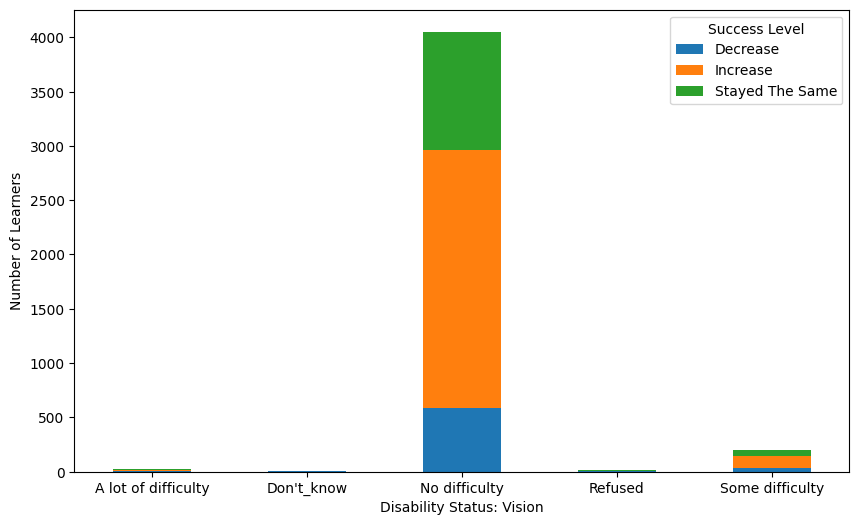

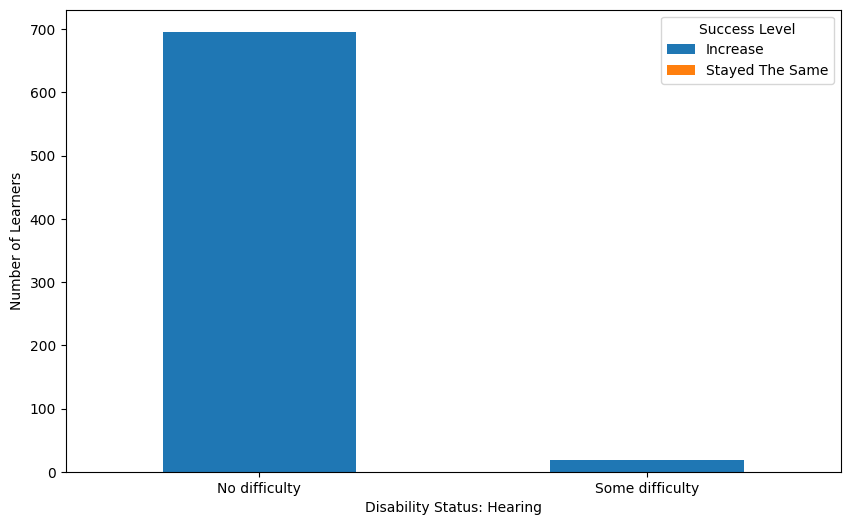

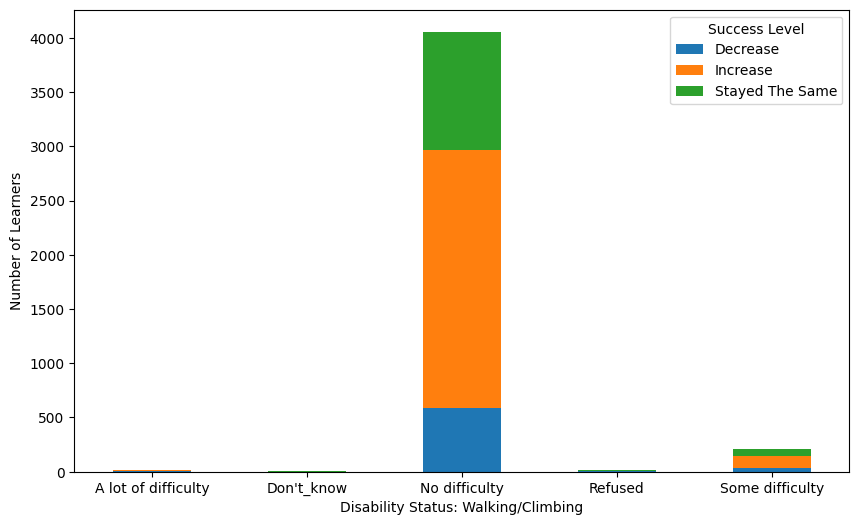

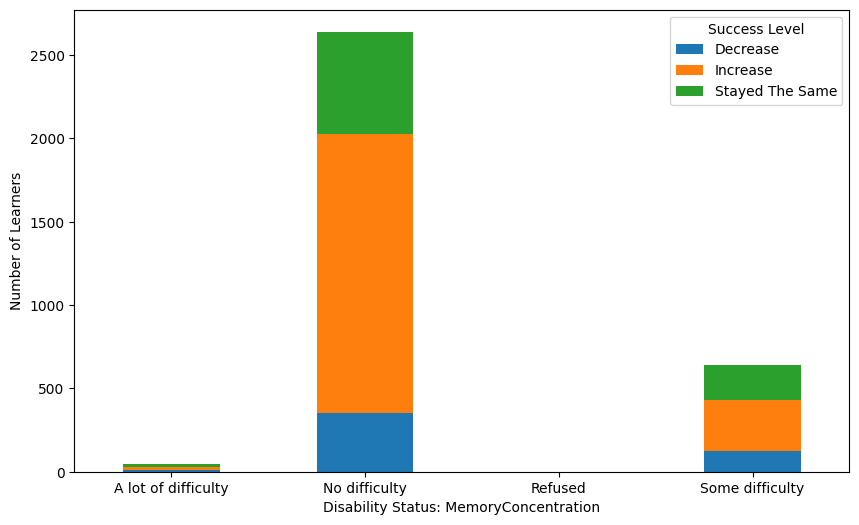

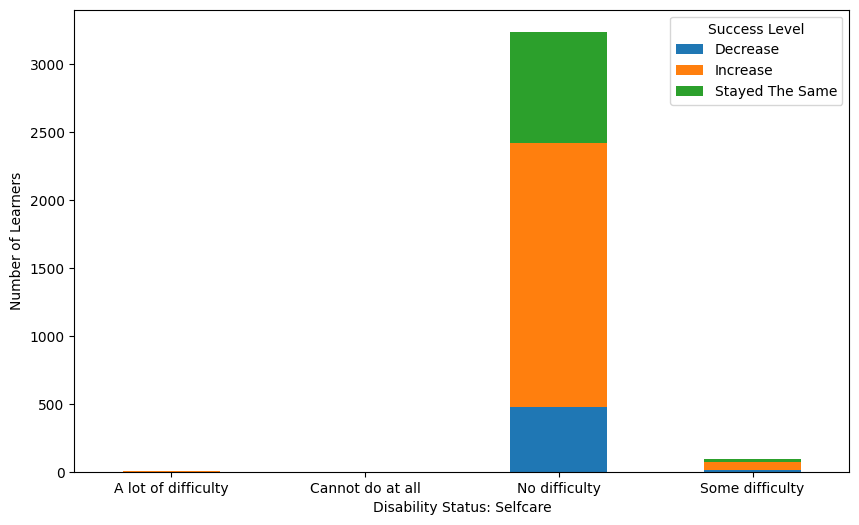

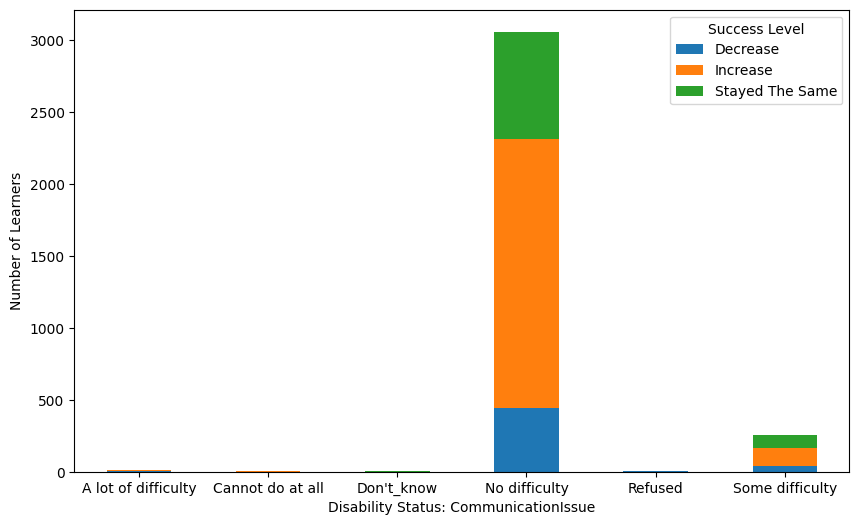

In [4]:
# Group by Disability_Status and Success to count occurrences
# decoded_baseline_mapping = {v: k for k, v in mappings["Baseline to Endline"].items()}
for dis in disabilities:
    # decoded_dis_mapping = {v: k for k, v in mappings[dis].items()}

    success_counts = df.groupby([dis, 'Baseline to Endline']).size().unstack(fill_value=0)
    # success_counts.index = success_counts.index.map(decoded_dis_mapping.get)
    # success_counts.columns = success_counts.columns.map(decoded_baseline_mapping.get)

    # Plotting success rate
    success_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    # plt.title("Comparison of Success for Learners With and Without Disabilities")
    plt.xlabel(f"Disability Status: {dis}")
    plt.ylabel("Number of Learners")
    plt.legend(title="Success Level")
    plt.xticks(rotation=0)
    plt.show()

In [5]:
df.Disability.value_counts()

Disability
Without Disability    34379
With Disability        1057
Name: count, dtype: int64

In [6]:
def plot_pie(df, country='all', cycle='all'):
    if country == 'all':
            df_cycle = df
            cycle = 'all'
    else:
        if cycle != 'all':
            df_cycle = df[df['AcademicYearName']==cycle].copy()
            # cycle = cycles[cycle]
        else:
            df_cycle = df[df.Project==country]
            cycle = country

    df_with_disabilities = df_cycle[df_cycle.Disability=='With Disability']
    df_without_disabilities = df_cycle[df_cycle.Disability=='Without Disability']

    # Count occurrences for each 'Baseline to Endline' category for each group
    all_learners_counts = df_cycle['Baseline to Endline'].value_counts()
    with_disabilities_counts = df_with_disabilities['Baseline to Endline'].value_counts()
    without_disabilities_counts = df_without_disabilities['Baseline to Endline'].value_counts()

    # Plotting pie charts for each group
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Baseline to Endline Progress: {cycle}")

    # All learners pie chart
    axes[0].pie(all_learners_counts, labels=all_learners_counts.index, autopct='%1.1f%%', startangle=140)
    axes[0].set_title("All Learners")

    # Learners with disabilities pie chart
    axes[1].pie(with_disabilities_counts, labels=with_disabilities_counts.index, autopct='%1.1f%%', startangle=140)
    axes[1].set_title("Learners With Disabilities")

    # Learners without disabilities pie chart
    axes[2].pie(without_disabilities_counts, labels=without_disabilities_counts.index, autopct='%1.1f%%', startangle=140)
    axes[2].set_title("Learners Without Disabilities")

    plt.show()


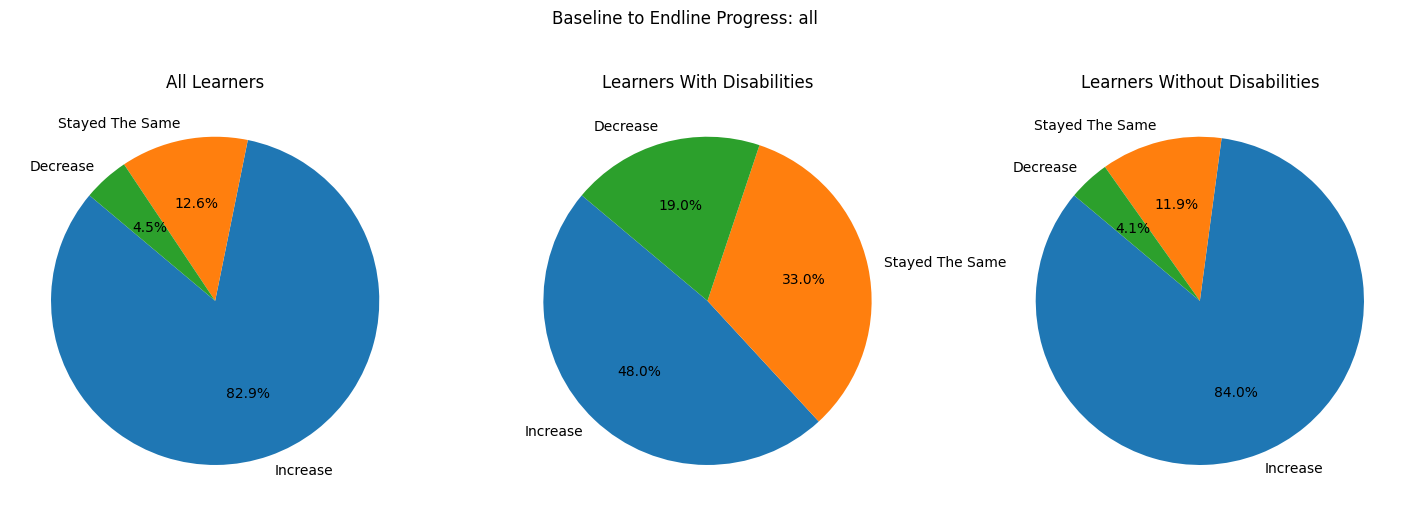

Baana


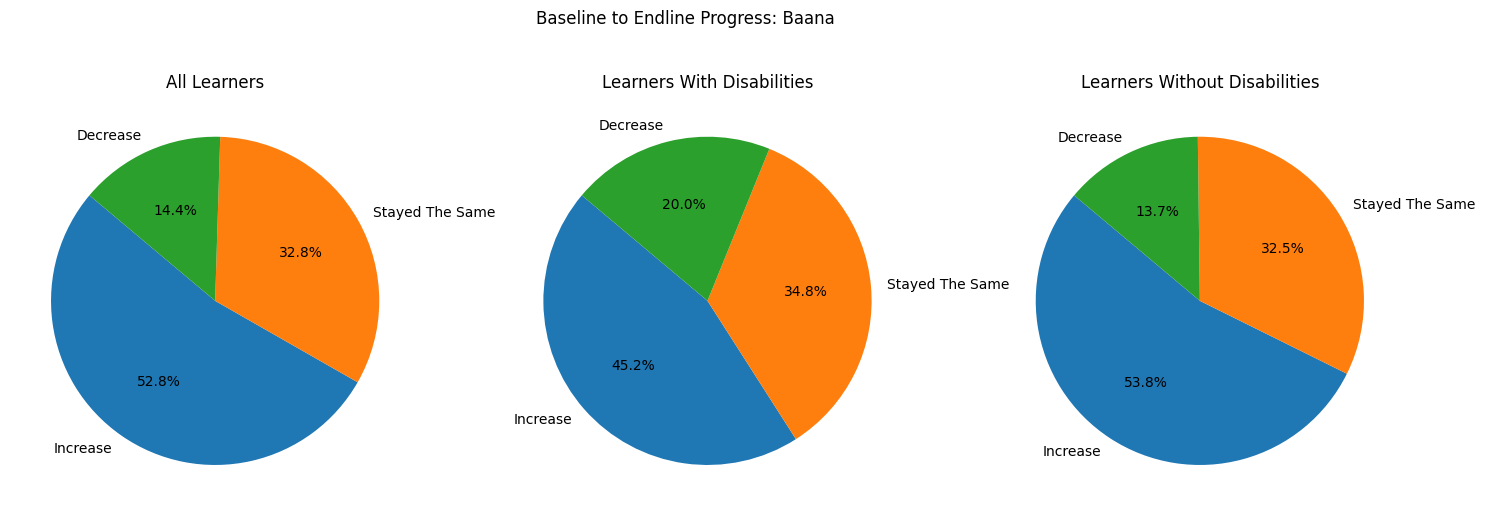

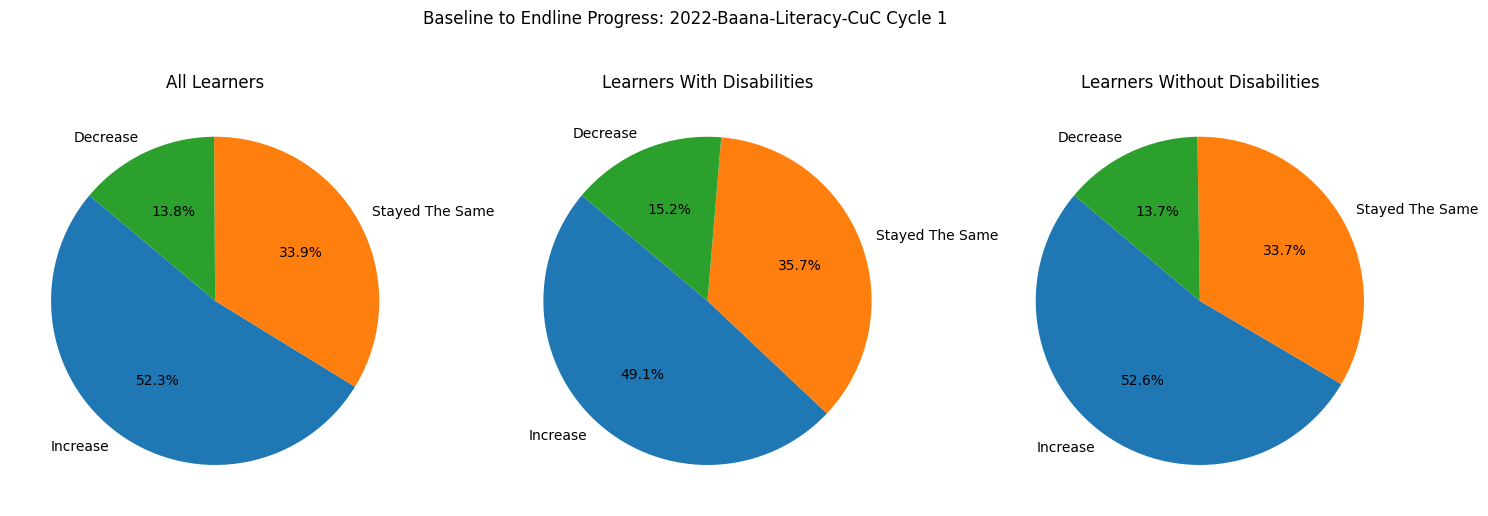

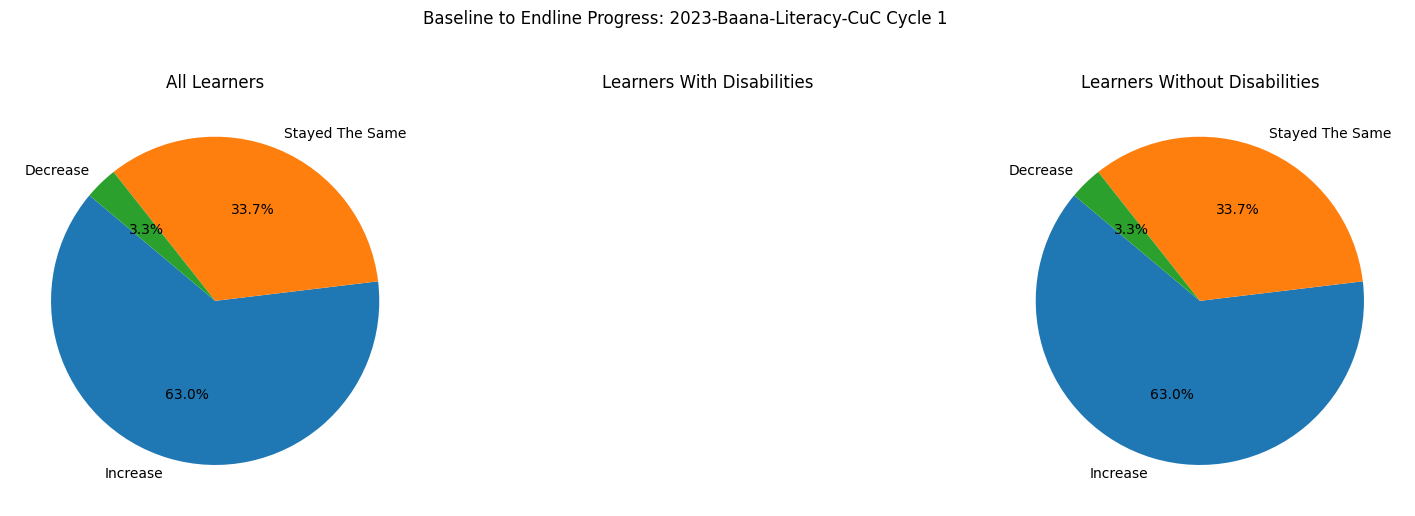

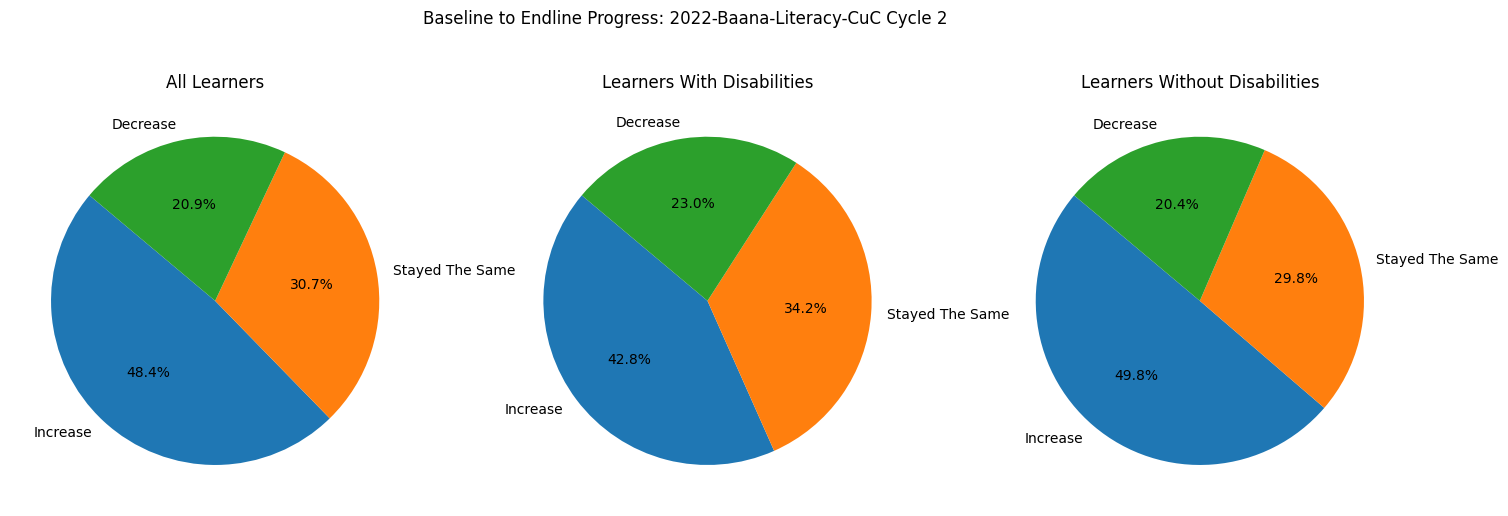

PPL


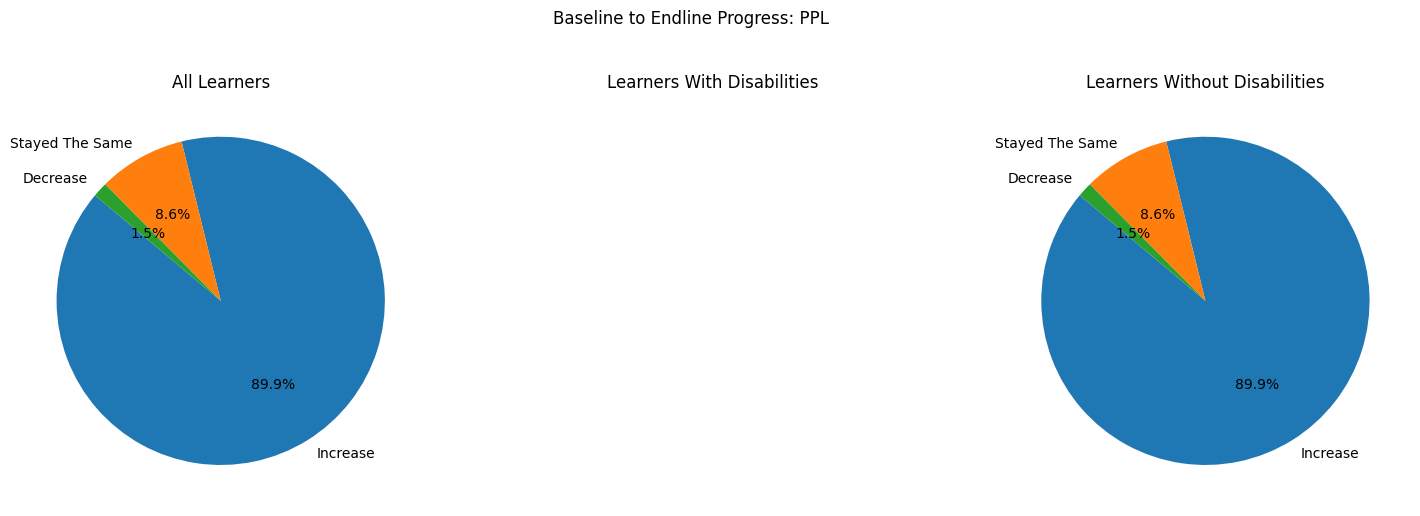

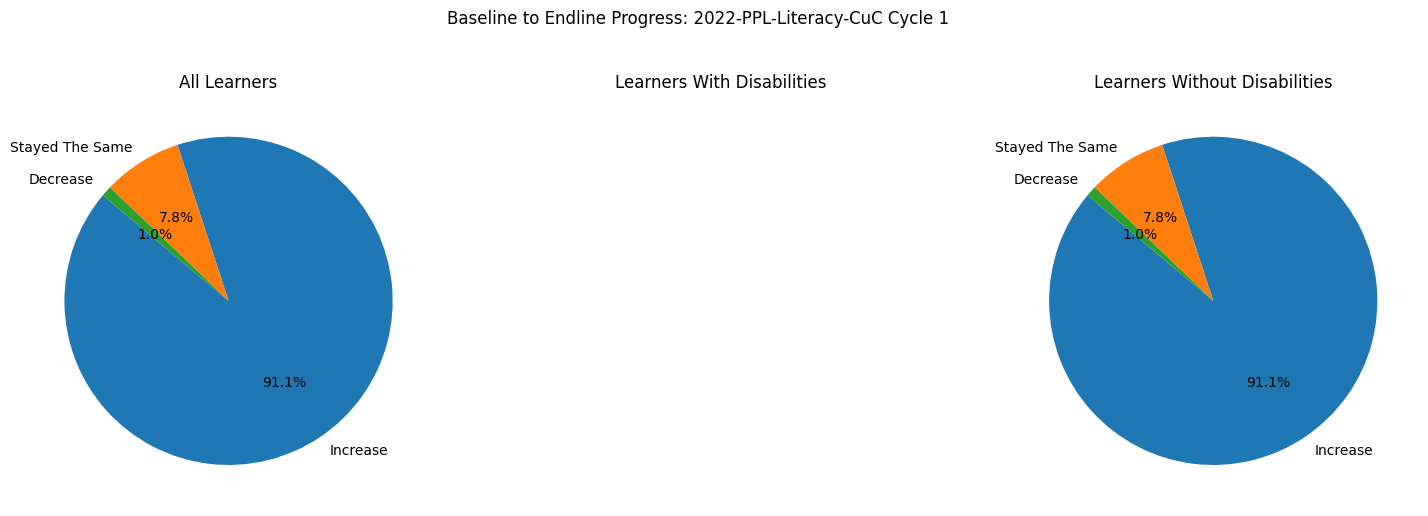

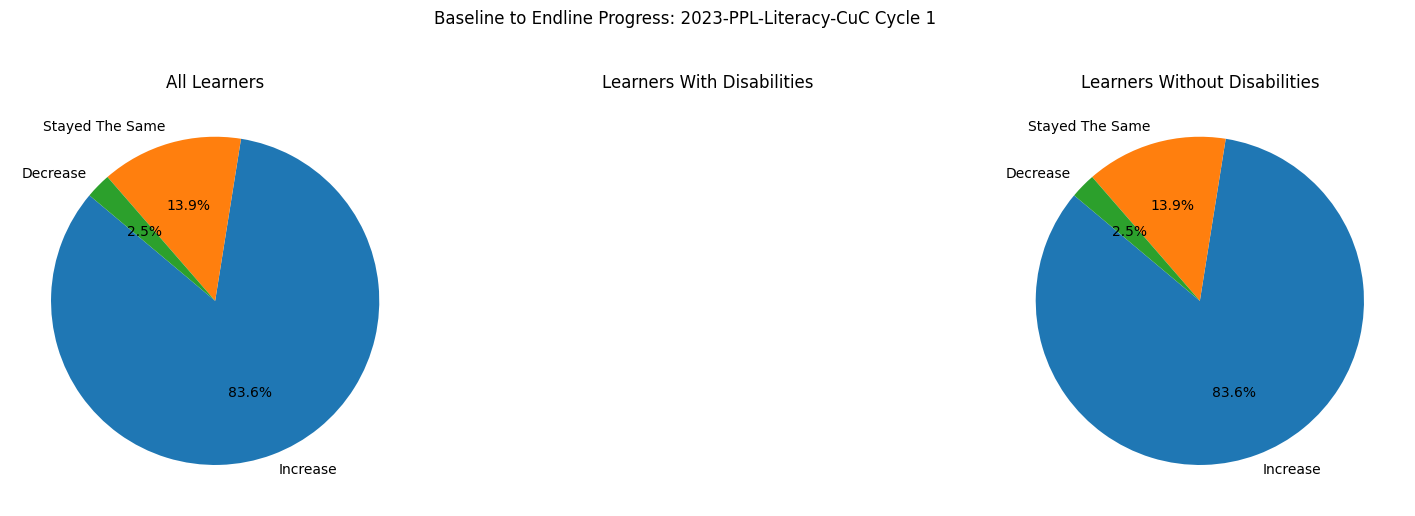

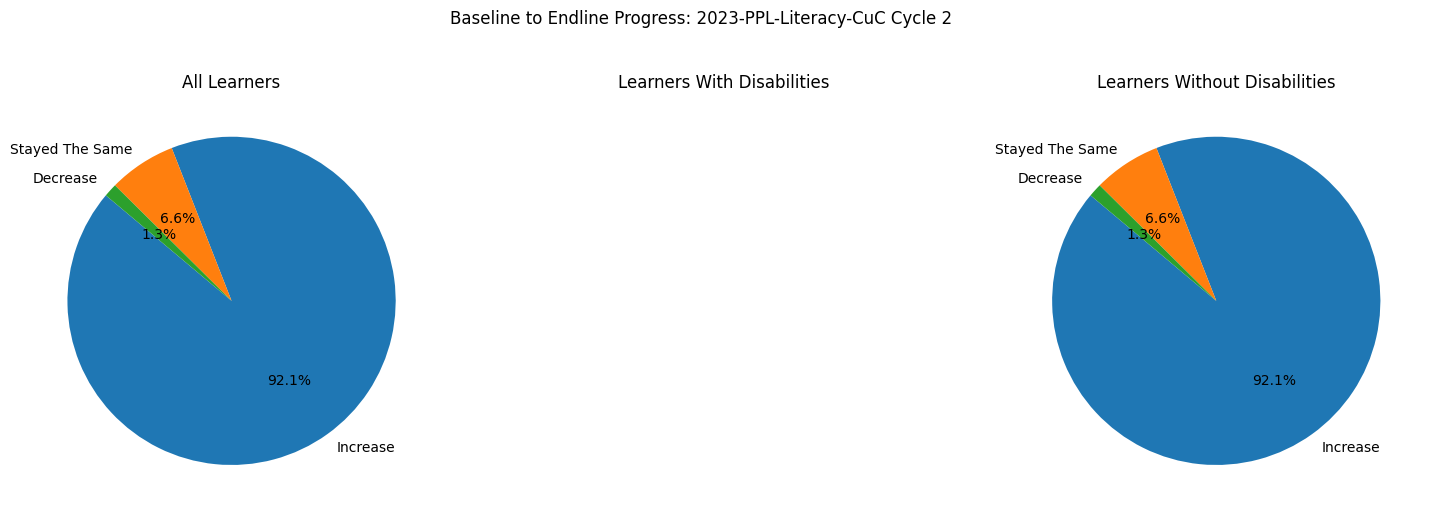

Hempel


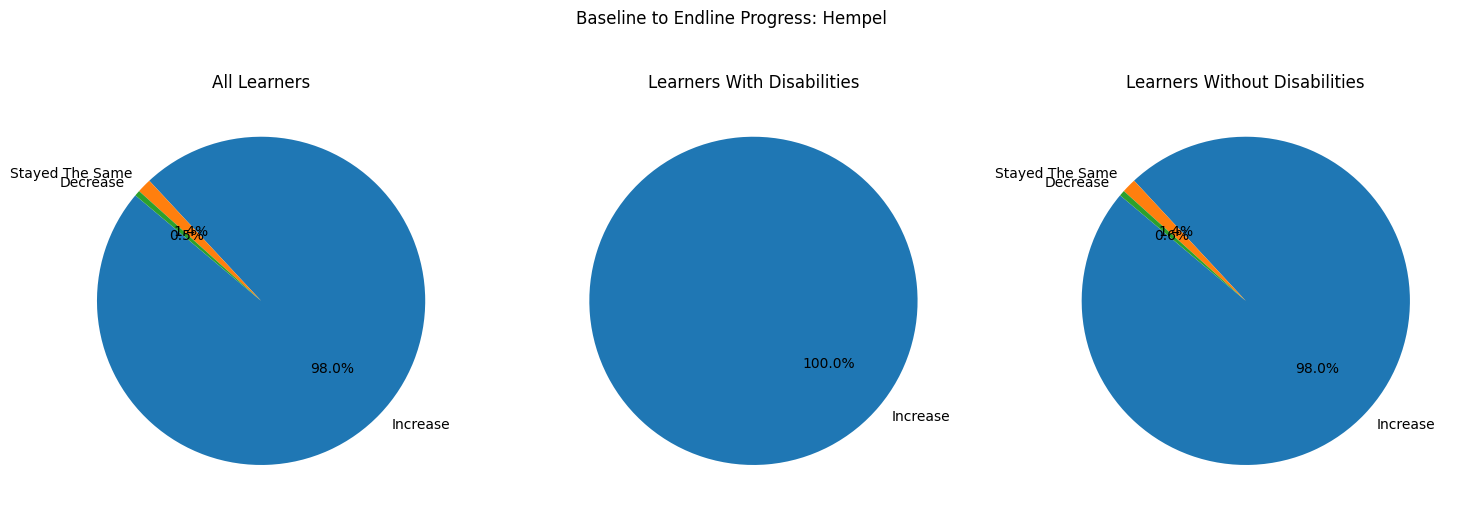

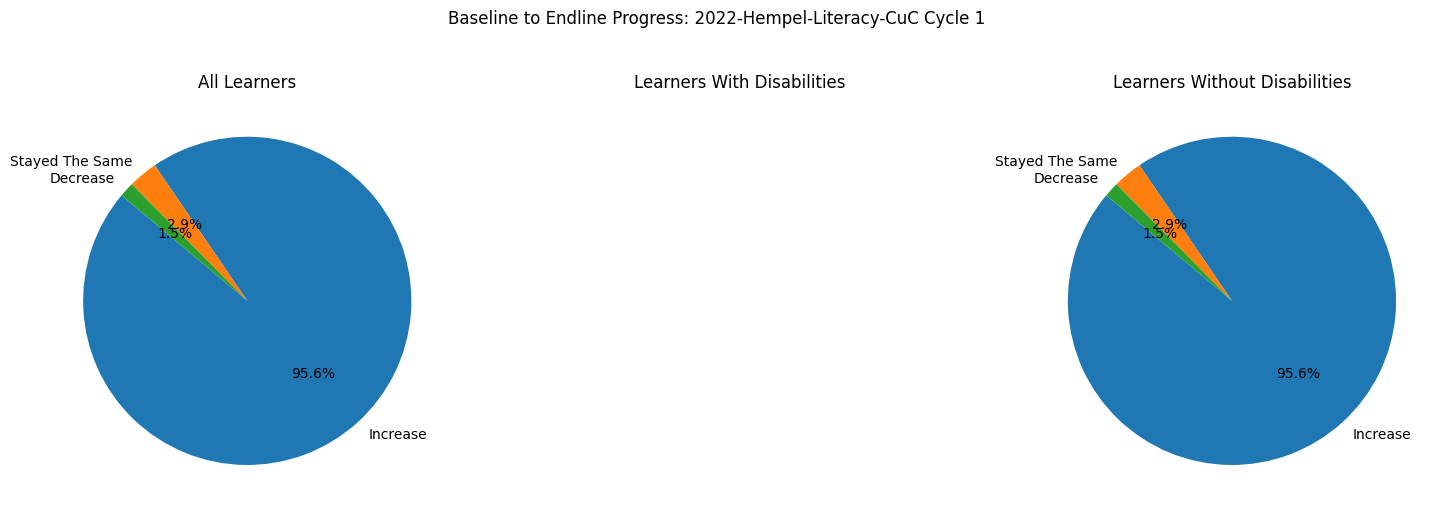

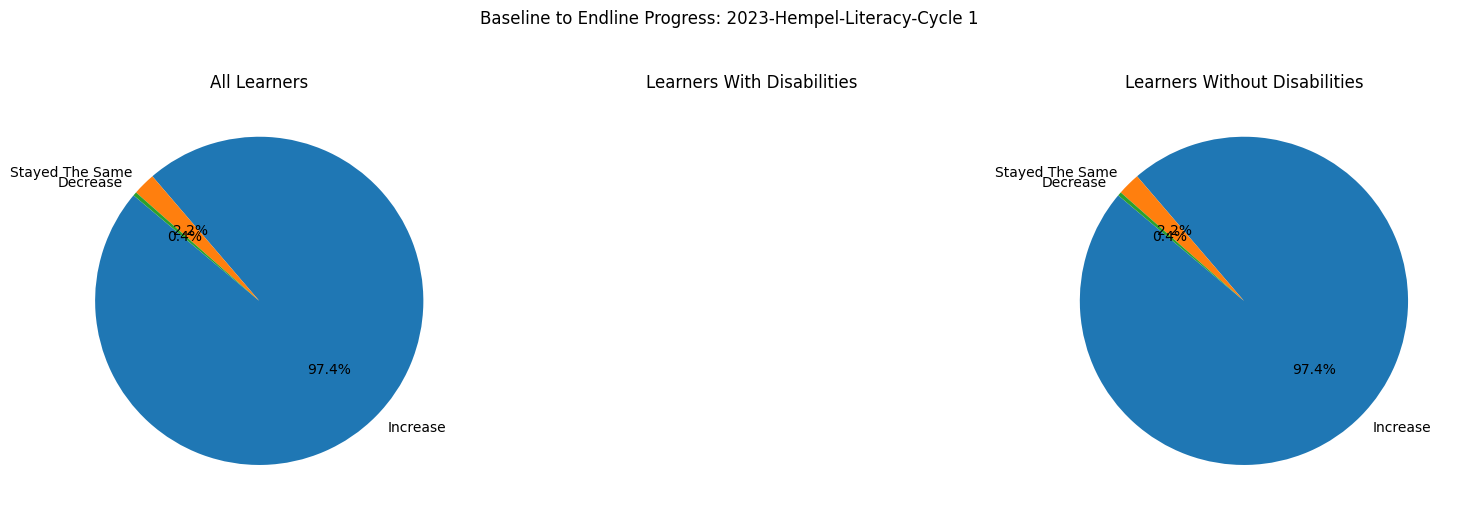

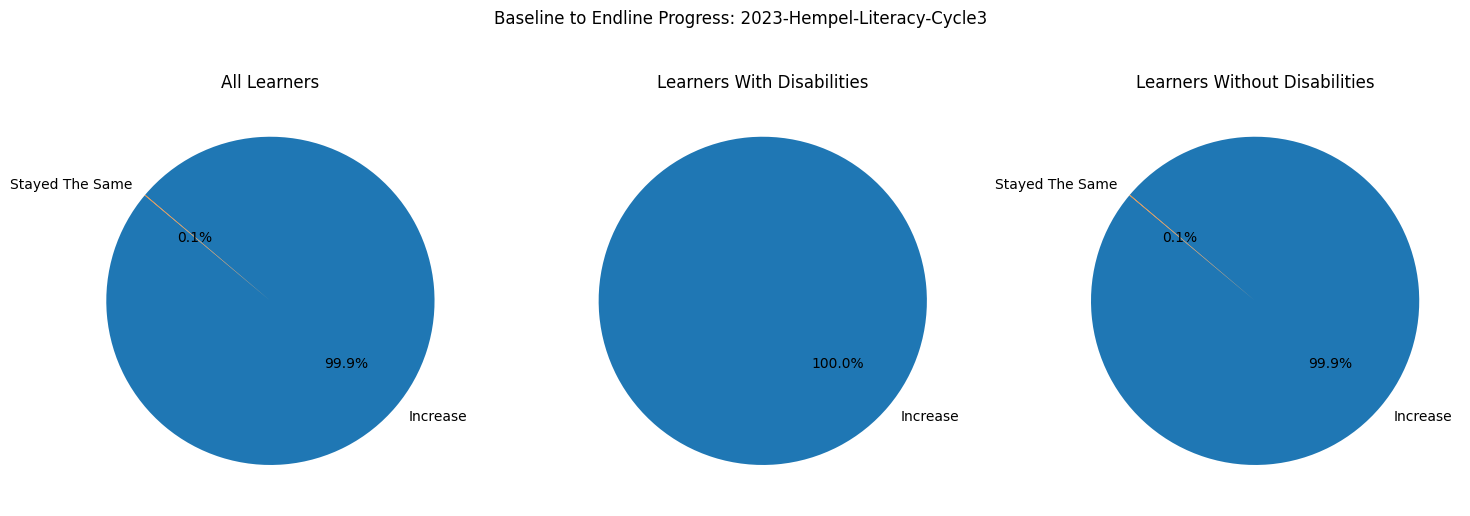

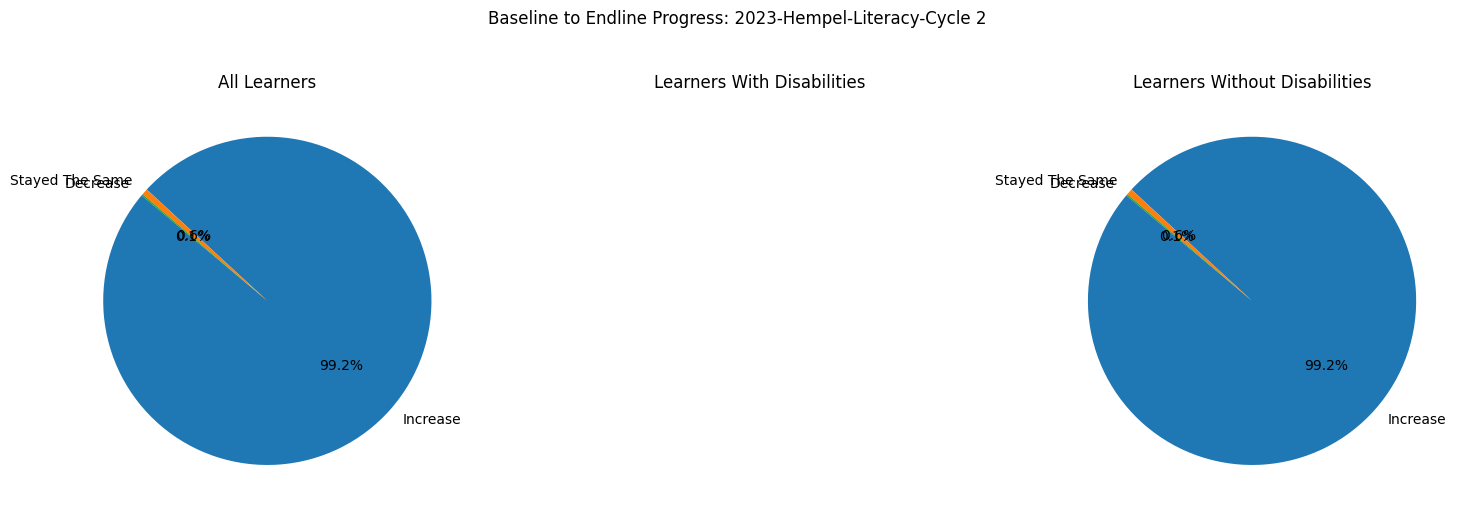

In [7]:
projects = ['Baana', 'PPL', 'Hempel']
plot_pie(df)
for project in projects:
    print(project)
    plot_pie(df, project)
    for cycle in df[df.Project==project].AcademicYearName.unique():
        plot_pie(df, project, cycle)
           